In [2]:
import pandas as pd
import matplotlib.pyplot as plt

/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
ercot_load = pd.read_csv("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/thesis2/data/PGscen/ERCOT/Load/Actual/load_actual_1h_zone_2017_2018_utc.csv")
ercot_wind = pd.read_csv("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/thesis2/data/PGscen/ERCOT/Wind/Actual/wind_actual_1h_site_2017_2018_utc.csv")
ercot_solar = pd.read_csv("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/thesis2/data/PGscen/ERCOT/Solar/Actual/solar_actual_1h_site_2017_2018_utc.csv")

solar_metadata = pd.read_excel("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/thesis2/data/PGscen/ERCOT/MetaData/solar_meta.xlsx")
wind_metadata = pd.read_excel("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/thesis2/data/PGscen/ERCOT/MetaData/wind_meta.xlsx")

solar_metadata_far_west = solar_metadata[(solar_metadata['proposed']=='Existing') & (solar_metadata['Zone']=='Far West')]
wind_metadata_far_west = wind_metadata[(wind_metadata['Group']=='Existing') & (wind_metadata['Region']=='Far West')]


In [27]:
ercot_solar

,Time,Adamstown Solar,Agate Solar,Angelina Solar,Angelo Solar,Angus Solar,Anson Solar,"Anson Solar Center, Phase II","Anson Solar Center, Phase III",Aragorn Solar,...,solar364,solar365,solar433,solar434,solar435,solar436,solar437,solar438,solar509,solar530
0,2017-01-01 00:00:00+00:00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2017-01-01 01:00:00+00:00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2017-01-01 02:00:00+00:00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2017-01-01 03:00:00+00:00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2017-01-01 04:00:00+00:00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2018-12-31 19:00:00+00:00,160.859375,34.5670,85.3125,140.379687,52.391979,143.238333,132.24,148.1850,141.681150,...,1.596375,0.900900,1.832812,5.820292,5.607650,5.185638,5.185638,11.088648,17.395950,46.006838
17516,2018-12-31 20:00:00+00:00,170.182292,40.3000,89.3025,148.403125,59.054271,151.710000,140.54,157.1175,149.148675,...,1.517063,0.857047,1.160156,3.696170,3.561777,3.282469,3.282469,7.299985,16.502200,35.790300
17517,2018-12-31 21:00:00+00:00,175.989583,39.5655,48.3875,150.718750,53.898646,152.858333,141.54,158.4450,155.082330,...,1.471500,0.830830,1.369531,4.344795,4.184849,3.874860,3.874860,9.028408,12.787775,31.455450
17518,2018-12-31 22:00:00+00:00,107.708333,24.3425,3.3075,114.826562,42.139583,109.850000,102.70,114.1425,134.617275,...,1.382906,0.780303,0.372656,1.193271,1.150654,1.054369,1.054369,2.342533,5.605600,22.720913


In [9]:
solar_metadata[solar_metadata['proposed']=='Existing'].groupby('Zone').count()

,site_ids,AC_capacity_MW,latitude,longitude,elevation,timezone,proposed,ISO
Zone,,,,,,,,
Coast,10,10,10,10,10,10,10,10
East,2,2,2,2,2,2,2,2
Far West,3,3,3,3,3,3,3,3
South Central,6,6,6,6,6,6,6,6
West,1,1,1,1,1,1,1,1


In [14]:
wind_metadata[wind_metadata['Group']=='Proposed'].groupby('Region').count().sum()

Facility.Name    139
lati             139
longi            139
Capacity         139
NumberOfUnits    139
Group            139
dtype: int64

In [45]:
ercot_solar

,Time,Adamstown Solar,Agate Solar,Angelina Solar,Angelo Solar,Angus Solar,Anson Solar,"Anson Solar Center, Phase II","Anson Solar Center, Phase III",Aragorn Solar,...,solar364,solar365,solar433,solar434,solar435,solar436,solar437,solar438,solar509,solar530
0,2017-01-01 00:00:00+00:00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2017-01-01 01:00:00+00:00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2017-01-01 02:00:00+00:00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2017-01-01 03:00:00+00:00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2017-01-01 04:00:00+00:00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2018-12-31 19:00:00+00:00,160.859375,34.5670,85.3125,140.379687,52.391979,143.238333,132.24,148.1850,141.681150,...,1.596375,0.900900,1.832812,5.820292,5.607650,5.185638,5.185638,11.088648,17.395950,46.006838
17516,2018-12-31 20:00:00+00:00,170.182292,40.3000,89.3025,148.403125,59.054271,151.710000,140.54,157.1175,149.148675,...,1.517063,0.857047,1.160156,3.696170,3.561777,3.282469,3.282469,7.299985,16.502200,35.790300
17517,2018-12-31 21:00:00+00:00,175.989583,39.5655,48.3875,150.718750,53.898646,152.858333,141.54,158.4450,155.082330,...,1.471500,0.830830,1.369531,4.344795,4.184849,3.874860,3.874860,9.028408,12.787775,31.455450
17518,2018-12-31 22:00:00+00:00,107.708333,24.3425,3.3075,114.826562,42.139583,109.850000,102.70,114.1425,134.617275,...,1.382906,0.780303,0.372656,1.193271,1.150654,1.054369,1.054369,2.342533,5.605600,22.720913


In [65]:
wind_metadata_far_west['lati'].mean(), solar_metadata_far_west['latitude'].mean()

(31.945076000000004, 31.356666666666666)

In [67]:
wind_metadata_far_west['longi'].mean(), solar_metadata_far_west['longitude'].mean()

(-101.90936000000002, -102.38)

In [48]:
solar_far_west = ercot_solar[['Time']+solar_metadata_far_west['site_ids'].tolist()]
wind_far_west = ercot_wind[['Time']+wind_metadata_far_west['Facility.Name'].tolist()]

In [59]:
solar_far_west['total_solar'] = solar_far_west.drop('Time', axis=1).sum(axis=1)
wind_far_west['total_wind']=wind_far_west.drop('Time', axis=1).sum(axis=1)

/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


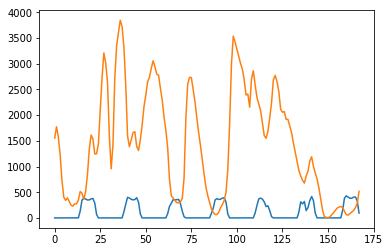

In [60]:
plt.plot(solar_far_west['total_solar'][:24*7*1])
plt.plot(wind_far_west['total_wind'][:24*7*1])

In [61]:
wind_far_west

,Time,Bearkat I,Big Spring Wind Farm,Brazos Wind Ranch,Bull Creek Wind Farm,Capricorn Ridge,Delaware Mountain Wind Farm,Desert Sky Wind Farm,Elbow Creek Wind Farm,Fluvanna I,...,Red Canyon Wind Farm,Sand Bluff Wind Farm,Sherbino,Southwest Mesa Wind Farm,Stanton Energy Center Wind Farm,Stephens Ranch,West Texas Windplant,Wind Power Partners '94 Wind Farm,Woodward Mountain I & II Wind Farm,total_wind
0,2017-01-01 00:00:00+00:00,29.612212,14.56884,116.061834,67.500000,398.746998,4.833125,36.112499,56.409225,88.189500,...,44.114000,32.5200,69.775001,14.187308,14.85,152.709376,12.024833,1.047540,2.30263,1553.029074
1,2017-01-01 01:00:00+00:00,47.130450,17.86070,129.690167,80.355000,278.453629,4.935250,53.286001,71.128650,98.005602,...,49.294000,41.3775,46.325001,16.153433,42.62,190.111426,12.082583,0.812175,57.29955,1773.732626
2,2017-01-01 02:00:00+00:00,81.249225,17.43170,118.106086,74.310001,148.649500,5.619250,35.577500,70.905167,93.965201,...,44.891001,36.8775,29.425000,12.970183,42.06,177.863350,9.535167,2.065245,32.47640,1581.792861
3,2017-01-01 03:00:00+00:00,54.848962,14.22278,97.829333,51.720000,83.424542,4.769000,21.573875,58.186933,75.122950,...,37.184000,30.9000,72.250001,17.482909,34.89,127.085525,7.600542,1.621035,51.58956,1230.213377
4,2017-01-01 04:00:00+00:00,14.584875,7.82782,51.087833,41.490000,26.007792,4.505375,23.767375,34.162475,53.781351,...,19.418000,17.3850,17.775000,8.089200,19.75,117.030199,9.021833,2.993445,4.75167,728.316119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2018-12-31 19:00:00+00:00,120.022049,22.21362,38.288250,36.660000,419.764582,20.137625,67.329750,78.442650,42.877449,...,14.553000,56.0700,109.049999,31.913641,52.67,60.676526,31.839500,16.621410,38.98499,2127.434902
17516,2018-12-31 20:00:00+00:00,80.855925,14.39438,25.783334,19.830000,285.968291,21.049625,28.863250,50.852617,26.974850,...,9.800000,40.7775,63.050000,12.527025,36.27,35.835800,27.238750,10.886460,36.90863,1413.067384
17517,2018-12-31 21:00:00+00:00,31.693425,7.07564,14.862250,9.480000,132.504709,17.468125,8.065125,24.339366,12.807550,...,5.649000,17.7375,35.175000,5.205550,15.16,16.539600,27.665458,12.175995,17.91526,667.388814
17518,2018-12-31 22:00:00+00:00,11.815387,2.75418,12.891667,2.730000,56.007749,12.145750,2.447625,9.680892,9.544150,...,4.900000,7.2300,6.425000,2.122167,4.03,4.636100,21.255208,9.431175,8.23889,287.469203


In [36]:
solar_far_west = ercot_solar[ercot_solar['siteid'] in solar_metadata_far_west['site_ids']]

KeyError: 'siteid'

In [29]:
solar_metadata[solar_metadata['proposed']=='Existing']['site_ids']

167    solar109
168     solar21
169     solar22
170    solar286
171    solar287
172    solar288
173    solar289
174    solar290
175    solar291
176      solar3
177    solar362
178    solar363
179    solar364
180    solar365
181    solar433
182    solar434
183    solar435
184    solar436
185    solar437
186    solar438
187    solar509
188    solar530
Name: site_ids, dtype: object

In [68]:
solar_metadata.groupby('Zone')['site_ids'].count()

Zone
Coast            36
East              9
Far West         61
North            30
North Central    27
South            22
South Central    11
West             30
Name: site_ids, dtype: int64

In [69]:
wind_metadata.groupby('Region')['Facility.Name'].count()

Region
Coast             3
East              1
Far West         54
North            86
North Central    22
South            55
South Central     4
West             39
Name: Facility.Name, dtype: int64

In [28]:
solar_metadata[solar_metadata['proposed']=='Existing'].groupby('Zone')['site_ids'].count()

Zone
Coast            10
East              2
Far West          3
South Central     6
West              1
Name: site_ids, dtype: int64

In [25]:
wind_metadata[wind_metadata['Group']=='Existing'].groupby('Region')['Facility.Name'].count()

Region
Far West         30
North            49
North Central    10
South            16
West             20
Name: Facility.Name, dtype: int64

In [17]:
solar_metadata[solar_metadata['Zone']=="South Central"]

,site_ids,AC_capacity_MW,latitude,longitude,elevation,timezone,proposed,Zone,ISO
63,Garnet Solar,20.00,30.73,-97.46,185.30,-6,Proposed,South Central,ERCOT
127,Pflugerville 2 Solar,120.00,30.41,-97.58,190.64,-6,Proposed,South Central,ERCOT
128,Pflugerville Solar,144.00,30.41,-97.66,225.56,-6,Proposed,South Central,ERCOT
164,Smithland Texas Solar,200.53,31.09,-97.38,194.92,-6,Proposed,South Central,ERCOT
170,solar286,1.05,30.57,-97.70,249.65,-6,Existing,South Central,ERCOT
171,solar287,22.50,30.57,-97.70,249.65,-6,Existing,South Central,ERCOT
172,solar288,5.50,30.53,-97.70,234.50,-6,Existing,South Central,ERCOT
173,solar289,7.95,30.53,-97.70,234.50,-6,Existing,South Central,ERCOT
174,solar290,10.42,30.53,-97.70,234.50,-6,Existing,South Central,ERCOT
175,solar291,30.52,30.53,-97.70,234.50,-6,Existing,South Central,ERCOT


In [26]:
ercot_load.head()

,Time,Coast,East,Far_West,North,North_Central,South,South_Central,West
0,2017-01-01 04:00:00+00:00,8923.36,1152.48,2023.24,800.51,9238.63,2422.49,4780.48,1041.66
1,2017-01-01 05:00:00+00:00,8613.27,1101.60,2018.81,805.23,8952.84,2350.83,4560.56,1033.16
2,2017-01-01 06:00:00+00:00,8381.21,1067.41,2015.93,800.80,8815.30,2314.58,4439.02,1041.90
3,2017-01-01 07:00:00+00:00,8133.69,1042.13,2014.04,793.57,8698.92,2224.56,4269.77,1020.39
4,2017-01-01 08:00:00+00:00,7953.95,1014.65,2021.11,807.95,8674.12,2176.31,4135.68,1016.36


In [27]:
ercot_wind.head()

,Time,Aguayo Wind,Ajax Wind,Amazon Wind Farm Texas,Anacacho Wind Farm,Appaloosa Run Renewable Energy Project,Aquilla Lake,Aquilla Lake 2 Wind,Armstrong Wind,Azure Sky Wind 1,...,White Tail,Whitehorse Wind,Wildorado Wind Farm,Wildrose Wind,Willow Springs Wind Farm,Wilson Ranch,Wind Power Partners '94 Wind Farm,Windthorst-2,Wolf Ridge Wind Farm,Woodward Mountain I & II Wind Farm
0,2017-01-01 00:00:00+00:00,60.972334,138.442499,102.401750,0.00825,0.437500,78.258167,38.741667,11.680167,82.600000,...,0.000000,96.800807,0.0,9.075000,84.541667,23.890125,1.047540,16.733667,20.96250,2.30263
1,2017-01-01 01:00:00+00:00,95.158000,196.139999,104.889583,1.55100,9.377083,115.476669,57.166668,22.011000,105.670833,...,1.410500,120.713016,0.0,14.192292,93.416667,13.532750,0.812175,15.696667,16.68750,57.29955
2,2017-01-01 02:00:00+00:00,104.729333,260.610001,94.453333,2.87925,21.102083,110.005834,54.458334,27.935417,113.895833,...,6.172833,102.700316,0.0,14.948542,88.979168,22.028125,2.065245,18.309000,11.32500,32.47640
3,2017-01-01 03:00:00+00:00,99.192333,290.744998,63.165666,1.06425,27.387500,86.944167,43.041667,28.104083,117.745832,...,10.381583,65.802209,0.0,15.225833,89.854167,29.775375,1.621035,22.332333,15.05625,51.58956
4,2017-01-01 04:00:00+00:00,88.510335,250.477498,46.805000,1.88100,36.779166,54.321166,26.891666,28.483584,94.062499,...,15.060500,45.834642,0.0,28.813125,67.666666,3.374875,2.993445,11.758333,15.43125,4.75167


In [28]:
ercot_solar

,Time,Adamstown Solar,Agate Solar,Angelina Solar,Angelo Solar,Angus Solar,Anson Solar,"Anson Solar Center, Phase II","Anson Solar Center, Phase III",Aragorn Solar,...,solar364,solar365,solar433,solar434,solar435,solar436,solar437,solar438,solar509,solar530
0,2017-01-01 00:00:00+00:00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2017-01-01 01:00:00+00:00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2017-01-01 02:00:00+00:00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2017-01-01 03:00:00+00:00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2017-01-01 04:00:00+00:00,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2018-12-31 19:00:00+00:00,160.859375,34.5670,85.3125,140.379687,52.391979,143.238333,132.24,148.1850,141.681150,...,1.596375,0.900900,1.832812,5.820292,5.607650,5.185638,5.185638,11.088648,17.395950,46.006838
17516,2018-12-31 20:00:00+00:00,170.182292,40.3000,89.3025,148.403125,59.054271,151.710000,140.54,157.1175,149.148675,...,1.517063,0.857047,1.160156,3.696170,3.561777,3.282469,3.282469,7.299985,16.502200,35.790300
17517,2018-12-31 21:00:00+00:00,175.989583,39.5655,48.3875,150.718750,53.898646,152.858333,141.54,158.4450,155.082330,...,1.471500,0.830830,1.369531,4.344795,4.184849,3.874860,3.874860,9.028408,12.787775,31.455450
17518,2018-12-31 22:00:00+00:00,107.708333,24.3425,3.3075,114.826562,42.139583,109.850000,102.70,114.1425,134.617275,...,1.382906,0.780303,0.372656,1.193271,1.150654,1.054369,1.054369,2.342533,5.605600,22.720913


In [29]:
# Transform the DataFrame
ercot_solar_long = pd.melt(ercot_solar, id_vars=['Time'], var_name='source', value_name='generation')
# Rename the column containing time information appropriately if needed
ercot_solar_long.rename(columns={'Time': 'time'}, inplace=True)
ercot_solar = ercot_solar_long

In [30]:
ercot_solar.head()

,time,source,generation
0,2017-01-01 00:00:00+00:00,Adamstown Solar,0.0
1,2017-01-01 01:00:00+00:00,Adamstown Solar,0.0
2,2017-01-01 02:00:00+00:00,Adamstown Solar,0.0
3,2017-01-01 03:00:00+00:00,Adamstown Solar,0.0
4,2017-01-01 04:00:00+00:00,Adamstown Solar,0.0


In [31]:
solar_metadata.head()

,site_ids,AC_capacity_MW,latitude,longitude,elevation,timezone,proposed,Zone,ISO
0,Adamstown Solar,250.0,33.25,-97.26,220.16,-6,Proposed,North,ERCOT
1,Agate Solar,60.0,32.45,-97.18,217.84,-6,Proposed,North Central,ERCOT
2,Angelina Solar,150.0,31.37,-94.86,85.00,-6,Proposed,East,ERCOT
3,Angelo Solar,195.0,31.41,-100.58,623.72,-6,Proposed,West,ERCOT
4,Angus Solar,113.0,31.69,-97.26,140.72,-6,Proposed,North Central,ERCOT


In [32]:
# This function adjusts the time by the timezone offset
def adjust_timezone(row):
    # Convert timezone from hours to a pandas timedelta
    offset = pd.Timedelta(hours=row['timezone'])
    # Adjust the time
    return row['time'] + offset

In [33]:
# Merge on the source/site_ids to add the metadata to the solar data
ercot_solar = pd.merge(ercot_solar, solar_metadata, left_on='source', right_on='site_ids', how='left')
print("Merged...")
ercot_solar['normalized_generation'] = ercot_solar['generation'] / ercot_solar['AC_capacity_MW']
print("Normalized...")
ercot_solar['time'] = pd.to_datetime(ercot_solar['time'], utc=True)
print("Time converted...")
# Apply the function to adjust times
ercot_solar['adjusted_time'] = ercot_solar.apply(adjust_timezone, axis=1)
print("Time adjusted...")

Merged...
Normalized...
Time converted...
Time adjusted...


In [34]:
ercot_solar

,time,source,generation,site_ids,AC_capacity_MW,latitude,longitude,elevation,timezone,proposed,Zone,ISO,normalized_generation,adjusted_time
0,2017-01-01 00:00:00+00:00,Adamstown Solar,0.000000,Adamstown Solar,250.0,33.25,-97.26,220.16,-6,Proposed,North,ERCOT,0.000000,2016-12-31 18:00:00+00:00
1,2017-01-01 01:00:00+00:00,Adamstown Solar,0.000000,Adamstown Solar,250.0,33.25,-97.26,220.16,-6,Proposed,North,ERCOT,0.000000,2016-12-31 19:00:00+00:00
2,2017-01-01 02:00:00+00:00,Adamstown Solar,0.000000,Adamstown Solar,250.0,33.25,-97.26,220.16,-6,Proposed,North,ERCOT,0.000000,2016-12-31 20:00:00+00:00
3,2017-01-01 03:00:00+00:00,Adamstown Solar,0.000000,Adamstown Solar,250.0,33.25,-97.26,220.16,-6,Proposed,North,ERCOT,0.000000,2016-12-31 21:00:00+00:00
4,2017-01-01 04:00:00+00:00,Adamstown Solar,0.000000,Adamstown Solar,250.0,33.25,-97.26,220.16,-6,Proposed,North,ERCOT,0.000000,2016-12-31 22:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959515,2018-12-31 19:00:00+00:00,solar530,46.006838,solar530,85.5,31.81,-94.90,110.70,-6,Existing,East,ERCOT,0.538092,2018-12-31 13:00:00+00:00
3959516,2018-12-31 20:00:00+00:00,solar530,35.790300,solar530,85.5,31.81,-94.90,110.70,-6,Existing,East,ERCOT,0.418600,2018-12-31 14:00:00+00:00
3959517,2018-12-31 21:00:00+00:00,solar530,31.455450,solar530,85.5,31.81,-94.90,110.70,-6,Existing,East,ERCOT,0.367900,2018-12-31 15:00:00+00:00
3959518,2018-12-31 22:00:00+00:00,solar530,22.720913,solar530,85.5,31.81,-94.90,110.70,-6,Existing,East,ERCOT,0.265742,2018-12-31 16:00:00+00:00


In [36]:
min(ercot_solar["timezone"]), max(ercot_solar["timezone"])

(-6, -6)

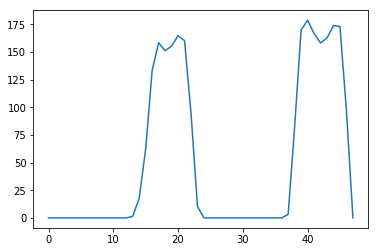

In [13]:
plt.plot(ercot_solar["generation"][:24*2])

In [15]:
def remove_overlapping_indices(primary_set, secondary_set):
    """
    Remove indices from the secondary_set that overlap with any index in the primary_set,
    considering the input length T.
    """
    to_remove = set()
    for primary_index in primary_set:
        # Calculate the range of indices that would overlap with primary_index considering T
        overlapping_range = set(range(primary_index[0] - T + 1, primary_index[1] + T))
        to_remove |= (
            overlapping_range & secondary_set
        )  # Find and add overlapping indices
    secondary_set -= to_remove  # Remove overlapping indices
    return secondary_set

In [23]:
import numpy as np

In [25]:
primary_list = [[4,7],[8,11],[6,9]]
secondary_list = [[2,5], [10,13],[14,17]]
remove_overlapping_indices(primary_list, secondary_list)

TypeError: unsupported operand type(s) for &: 'set' and 'list'

In [26]:
def remove_overlapping_intervals(primary_list, secondary_list):
    def is_overlapping(interval1, interval2):
        # Returns True if interval1 overlaps with interval2
        return interval1[0] < interval2[1] and interval1[1] > interval2[0]
    
    result = []  # List to store intervals from secondary_list that do not overlap with primary_list
    for secondary_interval in secondary_list:
        overlap = False
        for primary_interval in primary_list:
            if is_overlapping(primary_interval, secondary_interval):
                overlap = True
                break
        if not overlap:
            result.append(secondary_interval)
    return result

# Given lists
primary_list = [[4,7],[8,11],[6,9]]
secondary_list = [[2,5], [10,13], [14,17]]

# Removing overlapping intervals
result = remove_overlapping_intervals(primary_list, secondary_list)
result


[[14, 17]]